<a href="https://colab.research.google.com/github/segzy01/Oluwasegun-Durowoju-Prework/blob/master/Transferred%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Conv2D
#from keras.layers import Convolution2D
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from math import ceil


In [4]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')
#below where the file is in gdrive, change with yours
data_path = "/content/drive/My Drive/AI_764/"
###yearsBase, meanBase = np.loadtxt(data_path + 'file.csv', delimiter=',', unpack=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

from IPython.display import display
from PIL import Image

In [8]:
batch_size = 10

data = ImageDataGenerator(rescale=1. / 255, 
                          validation_split=0.2)

training_data = data.flow_from_directory('/content/drive/MyDrive/Iris_Imgs/Iris_Imgs', 
                                         target_size=(224, 224), shuffle=True, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

training_data_noshuffle = data.flow_from_directory('/content/drive/MyDrive/Iris_Imgs/Iris_Imgs', 
                                         target_size=(224, 224), shuffle=False, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

test_data = data.flow_from_directory('/content/drive/MyDrive/Iris_Imgs/Iris_Imgs', 
                                     target_size=(224, 224), batch_size = batch_size, shuffle=False,
                                     class_mode='categorical', subset='validation')

numClasses = 3

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [9]:
#vgg_conv = vgg16.VGG16(weights='imagenet', input_shape=(224, 224, 3) )

In [10]:
#trainStore = data.flow_from_directory('/content/drive/MyDrive/Iris_Imgs/Iris_Imgs', target_size=(224, 224, 3))

In [11]:
#vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False,
#input_shape=(224, 224, 3) )
vgg = VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3) )

58889256/58889256 [==============================] - 1s 0us/step


In [12]:
vgg.trainable = False

In [13]:
flatten_layer = tf.keras.layers.Flatten()
dense_layer_1 = Dense(500, activation='relu')
dense_layer_2 = Dense(250, activation='relu')
predict_layer = Dense(3, activation='softmax')

In [14]:
model = Sequential([ # stacking together
vgg,
flatten_layer, dense_layer_1, dense_layer_2,
predict_layer ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 500)               12544500  
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 3)                 753       
                                                                 
Total params: 27,385,191
Trainable params: 12,670,503
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
#for layer in model.layers:
    #layer.trainable = False


In [17]:
model.compile(optimizer = 'adam',
loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
# Define the optimizer
opt = keras.optimizers.Adam()

# Compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the number of epochs
MyEpochs = 30

# Train the model
model.fit(training_data,
          batch_size=10,
          epochs=MyEpochs,
          validation_data=test_data,
          shuffle=True)



Epoch 1/30
12/12 [==============================] - 94s 8s/step - loss: 2.4855 - accuracy: 0.5167 - val_loss: 1.1820 - val_accuracy: 0.5667
Epoch 2/30
12/12 [==============================] - 86s 7s/step - loss: 1.0295 - accuracy: 0.5417 - val_loss: 0.4454 - val_accuracy: 0.9667
Epoch 3/30
12/12 [==============================] - 87s 7s/step - loss: 0.6289 - accuracy: 0.7417 - val_loss: 0.3695 - val_accuracy: 0.9000
Epoch 4/30
12/12 [==============================] - 88s 8s/step - loss: 0.4412 - accuracy: 0.8167 - val_loss: 0.4697 - val_accuracy: 0.8667
Epoch 5/30
12/12 [==============================] - 92s 8s/step - loss: 0.3095 - accuracy: 0.8917 - val_loss: 0.3843 - val_accuracy: 0.8667
Epoch 6/30
12/12 [==============================] - 89s 8s/step - loss: 0.2787 - accuracy: 0.8917 - val_loss: 0.1912 - val_accuracy: 0.9000
Epoch 7/30
12/12 [==============================] - 87s 7s/step - loss: 0.2586 - accuracy: 0.8667 - val_loss: 0.2266 - val_accuracy: 0.9000
Epoch 8/30
12/12 [==

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [37]:
training_data.reset()
test_data.reset()

predicted_scores = model.predict(training_data_noshuffle, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

train_labels = training_data_noshuffle.labels

print(train_labels)
print(predicted_labels)

acc_score = accuracy_score(train_labels, predicted_labels)
CFM = confusion_matrix(train_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(train_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(train_labels, predicted_labels))

12/12 [==============================] - 71s 6s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]

 Accuracy: 0.933

 CFM: 
 [[40  0  0]
 [ 5 35  0]
 [ 0  3 37]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       0.92      0.88      0.90        40
           2       1.00      0.93      0.96        40

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0

In [38]:
test_labels = test_data.labels
print(test_labels)
#print(predicted_scores)
print(predicted_labels)

predicted_scores = model.predict(test_data, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

acc_score = accuracy_score(test_labels, predicted_labels)
CFM = confusion_matrix(test_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(test_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(test_labels, predicted_labels))


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
3/3 [==============================] - 16s 6s/step

 Accuracy: 0.933

 CFM: 
 [[10  0  0]
 [ 1  9  0]
 [ 0  1  9]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.90      0.90      0.90        10
           2       1.00      0.90      0.95        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



###ROC Curve

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

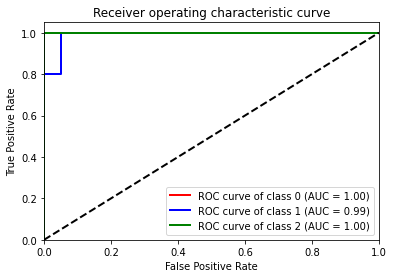

In [39]:

predicted_scores 

$
test_labels 

# Convert test_labels to one-hot encoding
from keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=3)

# Calculate the ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predicted_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
lw = 2
colors = ['red', 'blue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()
